

## 1. Project: EDA on Apple Data set

#### 2.1.  Task
I am excited to start an Exploratory Data Analysis on the Apple App Store dataset. EDA aims to familiarize oneself with the data, identify any issues, and uncover initial insights. Proper preparation involves handling missing values, formatting, normalizing features, and more. I will carefully clean and wrangle the data, documenting any changes or observations throughout the process. I plan to use a combination of visualizations and statistical summaries to understand the data's distribution, relationships between variables, outliers, and anomalies. My code will be annotated to track findings. I will summarize key takeaways and trends noticed during visualization and feature engineering analysis. Ultimately, I aim to synthesize my learnings into meaningful conclusions about the dataset's properties and quirks, providing a solid foundation for more advanced modeling. Ultimately, we will produce a summary and draw conclusions from our findings.

#### 2.2. Objectives
The objective of this project is to analyze app performance over time and guide developers in creating successful apps by understanding customer preferences.

#### 2.3.  Kernel Version Used:
Python 3.10.12

### 3. First of all Import the libraries
We will use the follwoing libraries
- Pandas: Data manipulation and analysis library.
- Numpy: Numerical computing library.
- Matplotlib: Data visualization library.
- Seaborn: Statistical data visualization library.
- Scipy: To provide a comprehensive set of numerical algorithms and tools for scientific computing in Python.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

### 4. Data Loading, Exploration & Wrangling
In order  to do EDA first import data from our computure


In [2]:
df=pd.read_csv("appleAppData.csv")

In [76]:
df.shape

(1229263, 22)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   App_Id                   1230376 non-null  object 
 1   App_Name                 1230375 non-null  object 
 2   AppStore_Url             1230376 non-null  object 
 3   Primary_Genre            1230376 non-null  object 
 4   Content_Rating           1230376 non-null  object 
 5   Size_Bytes               1230152 non-null  float64
 6   Required_IOS_Version     1230376 non-null  object 
 7   Released                 1230373 non-null  object 
 8   Updated                  1230376 non-null  object 
 9   Version                  1230376 non-null  object 
 10  Price                    1229886 non-null  float64
 11  Currency                 1230376 non-null  object 
 12  Free                     1230376 non-null  bool   
 13  DeveloperId              1230376 non-null 

#### 4.1. Get Top Values of Given Data
With just a single line of code! Quickly view the top rows of your dataset to get a sense of what you're working with, without having to scroll through the entire file.

In [4]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


In [5]:
df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [6]:
df.isna().sum()

App_Id                          0
App_Name                        1
AppStore_Url                    0
Primary_Genre                   0
Content_Rating                  0
Size_Bytes                    224
Required_IOS_Version            0
Released                        3
Updated                         0
Version                         0
Price                         490
Currency                        0
Free                            0
DeveloperId                     0
Developer                       0
Developer_Url                1109
Developer_Website          643988
Average_User_Rating             0
Reviews                         0
Current_Version_Score           0
Current_Version_Reviews         0
dtype: int64

Finding/Exploring/ feeling the numeric data finding out what our data telss us of the follwoing

Size_Bytes, Price, DeveloperId, Average_User_Rating, Reviews, Current_Version_Score, Current_Version_Reviews

In [7]:
df.Average_User_Rating.unique()

array([0.     , 5.     , 4.78132, ..., 4.00352, 3.91608, 4.82733])

In [8]:
df.Current_Version_Score.unique()

array([0.     , 5.     , 4.78132, ..., 4.00352, 3.91608, 4.82733])

In [9]:
df.Current_Version_Reviews.unique()

array([    0,     1,  1285, ..., 12691, 35476, 10481], dtype=int64)

In [10]:
df.Free.unique()

array([ True, False])

In [11]:
df.Currency.unique()

array(['USD'], dtype=object)

In [12]:
df.Size_Bytes.unique()

array([2.19934720e+07, 1.31358720e+07, 2.19432960e+07, ...,
       1.19404544e+08, 5.96570000e+05, 5.06896000e+05])

In [13]:
df.Required_IOS_Version.unique()

array(['8.0', '10.0', '9.0', '7.1', '12.0', '11.0', '13.0', '7.0', '9.3',
       '5.1.1', '11.3', '6.0', '12.1', '8.2', '6.1', '11.4', '10.3',
       '9.1', '8.4', '9.2', '4.0', '5.1', '8.1', '5.0', '10.10.0', '14.5',
       '14.0', '14.1', '4.3', '13.5', '11', '12.4', '10.10', '11.2',
       '14.4', '11.1', '12.2', '5.2', '10.1', '14.3', '4.2', '13.2',
       '3.2', '8.3', '3.1.3', '10.2', '10.9.0', '13.6', '3.0', '13.3',
       '9', '11.0.0', '3.1.2', '14.2', '13.4', '12.3', '13.1', '12',
       '9.3.5', '10', '9.4', '7.2', '9.0.0', '10.12', '13', '7', '10.13',
       '3.1', '2.2.1', '10.9', '10.8', '10.7', '12.0.0', '10.15', '10.5',
       '10.14', '15.0', '13.7', '10.11', '4.1', '10.6', '10.6.6', '7.0.0',
       '14.7', '10.13.0', '10.9.5', '12.5', '8', '6', '10.0.0', '10.6.8',
       '7.1.2', '10.12.2', '10.11.0', '14', '10.7.4', '10.3.3', '12.4.4',
       '10.8.0', '10.14.6', '10.4.0', '8.0.0', '10.15.1', '10.14.2',
       '10.15.0', '10.13.6', '14.0.0', '10.13.2', '10.7.3', '10.

In [14]:
df['Content_Rating'].unique()

array(['4+', '17+', '9+', '12+', 'Not yet rated'], dtype=object)

#### 4.2. Descriptive Statistics
We use descriptive statistics to summarize and understand the key features of dataset.

In [15]:
df.describe()

,Size_Bytes,Price,DeveloperId,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
count,1.230152e+06,1.229886e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06
mean,7.510857e+07,5.041264e-01,1.092869e+09,1.788387e+00,8.259478e+02,1.788387e+00,8.259478e+02
std,2.318726e+08,6.869674e+00,4.090897e+08,2.154105e+00,5.016051e+04,2.154105e+00,5.016051e+04
min,2.762800e+04,0.000000e+00,2.816565e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.041344e+07,0.000000e+00,7.381109e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.333158e+07,0.000000e+00,1.179711e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.365466e+07,0.000000e+00,1.471960e+09,4.333330e+00,3.000000e+00,4.333330e+00,3.000000e+00
max,7.677945e+10,9.999900e+02,1.590233e+09,5.000000e+00,2.268533e+07,5.000000e+00,2.268533e+07


#### 4.3. Dealing with the missing data and the incorrect records/Duplicate Data
#### 4.4. Imputing the Null Values
Through following code we will get the percentages of missing values within the given data. Use this code snippet to easily identify which features in your dataset have the most missing data with a sorted percentage of null values.We Will clean the dataset by removing duplicate columns with missing values and imputing the rest.

Based on Developer Website(52 %) lack of relevance and the high number of NULL values associated with it, we have made the decision to drop this attribute from the dataset.

In [16]:
# using drop na method
df.drop(['Developer_Website'], axis=1, inplace = True)

In [17]:
print((df.isnull().sum()/len(df))*100)

App_Id                     0.000000
App_Name                   0.000081
AppStore_Url               0.000000
Primary_Genre              0.000000
Content_Rating             0.000000
Size_Bytes                 0.018206
Required_IOS_Version       0.000000
Released                   0.000244
Updated                    0.000000
Version                    0.000000
Price                      0.039825
Currency                   0.000000
Free                       0.000000
DeveloperId                0.000000
Developer                  0.000000
Developer_Url              0.090135
Average_User_Rating        0.000000
Reviews                    0.000000
Current_Version_Score      0.000000
Current_Version_Reviews    0.000000
dtype: float64


Text(0.5, 1.0, 'Missing null values')

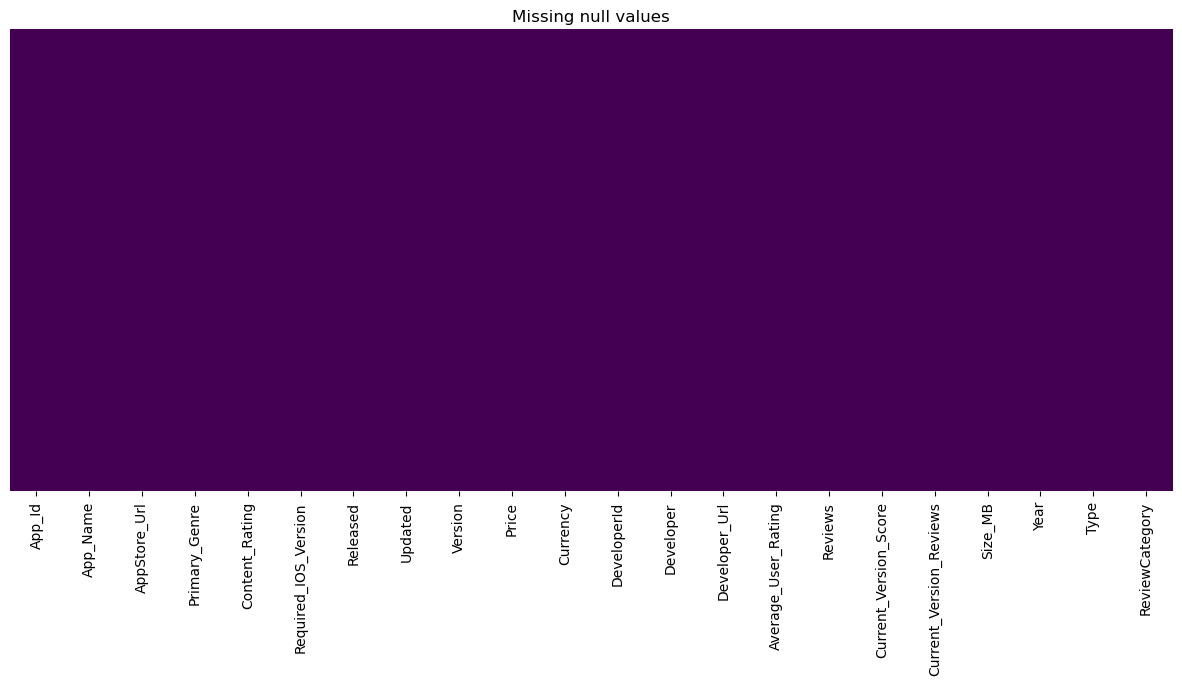

In [75]:
plt.figure(figsize= (15,6))
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

> Fig:1.  Showing null values after imputation

Price, Size_Bytes are important columns so it is good to fill the null values.

In [19]:
#Missing values dealing
#filling mean value of Price column in the null places of that column
df.Price.fillna(value=df['Price'].mean())
df.Size_Bytes.fillna(value=df['Size_Bytes'].mean())

##have a view of refreshed dataset again
df.isnull().sum()




App_Id                        0
App_Name                      1
AppStore_Url                  0
Primary_Genre                 0
Content_Rating                0
Size_Bytes                  224
Required_IOS_Version          0
Released                      3
Updated                       0
Version                       0
Price                       490
Currency                      0
Free                          0
DeveloperId                   0
Developer                     0
Developer_Url              1109
Average_User_Rating           0
Reviews                       0
Current_Version_Score         0
Current_Version_Reviews       0
dtype: int64

 To view only those rows where a column has null values

In [20]:
df[df['Released'].isnull()].head(2)


,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
264853,com.ironhidegames.frontiers.universal.premium,Kingdom Rush Frontiers TD+,https://apps.apple.com/us/app/kingdom-rush-fro...,Games,12+,NaN,13.0,NaN,2021-11-12T08:00:00Z,5.4.15,NaN,USD,False,1542047256,Ironhide Irl,https://apps.apple.com/us/developer/ironhide-i...,0.0,0,0.0,0
836858,com.redgamesco.transformers,Transformers: Tactical Arena,https://apps.apple.com/us/app/transformers-tac...,Games,9+,NaN,13.5.0,NaN,2021-11-05T07:00:00Z,0.1,NaN,USD,False,1456007507,"RED GAMES CO, LLC",https://apps.apple.com/us/developer/red-games-...,0.0,0,0.0,0


In [21]:
df[df['Developer_Url'].isnull()].head(2)


,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
2382,com.TroopAdmin2,C&S Troop Admin,https://apps.apple.com/us/app/c-s-troop-admin/...,Business,4+,87355392.0,10.0,2021-06-04T07:00:00Z,2021-06-05T03:40:31Z,1.0,0.0,USD,True,1569780624,Hunter Biscuit & Wolf Limited,NaN,0.0,0,0.0,0
2827,com.dhrubajyoti.bangla,Bangla Rhymes,https://apps.apple.com/us/app/bangla-rhymes/id...,Education,4+,56445952.0,9.1,2019-03-23T18:27:49Z,2019-03-23T18:27:49Z,1.0.1,0.0,USD,True,1452131894,Dhrubajyoti Dey,NaN,5.0,5,5.0,5


In [22]:
df[df['App_Name'].isnull()].head(2)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
964888,se.promedia.NA,NaN,https://apps.apple.com/us/app/na/id449134868?uo=4,News,4+,19528704.0,9.0,2011-08-08T11:45:30Z,2020-12-21T14:08:02Z,8.1.2,0.0,USD,True,449134871,Promedia,https://apps.apple.com/us/developer/promedia/i...,5.0,1,5.0,1


 ##### 4.4.1.  Null Handling: Filling Null Values Approach
Fill null values with caution! Unique values associated with specific features, such as AppID and AppName, in rows where Released is null, can make filling null values tricky. Instead, consider dropping only those rows where Developer_URL, Released, and appName are null to ensure data integrity.

In [23]:
df.dropna(subset=['Developer_Url'], inplace=True)



In [24]:
df.dropna(subset=['Released'], inplace=True)

In [25]:
df.dropna(subset=['App_Name'], inplace=True)
##have a view of refreshed dataset again
df.isnull().sum()

App_Id                       0
App_Name                     0
AppStore_Url                 0
Primary_Genre                0
Content_Rating               0
Size_Bytes                 221
Required_IOS_Version         0
Released                     0
Updated                      0
Version                      0
Price                      487
Currency                     0
Free                         0
DeveloperId                  0
Developer                    0
Developer_Url                0
Average_User_Rating          0
Reviews                      0
Current_Version_Score        0
Current_Version_Reviews      0
dtype: int64

We have cleaned the dataset from null values 🙂

Next, Find duplications and Analyse them if its a valid DUPLICATION

In [26]:
any_duplicates = df.duplicated(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews']).any()

In [27]:
boolean = df['App_Id'].duplicated().any()
boolean

False

In [28]:
boolean = df['AppStore_Url'].duplicated().any()
boolean

False

In [29]:
boolean = df['App_Name'].duplicated().any()
boolean

True

In [30]:
df['App_Name'].value_counts()

Vanguard                          6
Bloom                             5
Linker                            5
Sketch                            4
Atelier                           4
                                 ..
Vikings HEXA Block !              1
Vikings Empire Battle Strategy    1
Vikings and Bankers               1
Vikings Adventure - Dash          1
Sổ Điểm Thông Minh                1
Name: App_Name, Length: 1222413, dtype: int64

In [31]:
df[df['App_Name'] == 'Vanguard']

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
478488,com.vanguard.app,Vanguard,https://apps.apple.com/us/app/vanguard/id33518...,Finance,4+,160800768.0,10.0,2009-10-24T19:14:54Z,2021-08-26T19:55:20Z,11.14,0.0,USD,True,335186212,"The Vanguard Group, Inc.",https://apps.apple.com/us/developer/the-vangua...,4.73977,167472,4.73977,167472
624553,com.omr.vngu,Vanguard,https://apps.apple.com/us/app/vanguard/id15822...,Games,4+,191240192.0,10.0,2021-08-27T07:00:00Z,2021-08-27T12:16:53Z,1.0,0.0,USD,True,1582197355,omar naser,https://apps.apple.com/us/developer/omar-naser...,3.00000,2,3.00000,2
871735,br.com.vanguardhome,Vanguard,https://apps.apple.com/us/app/vanguard/id14660...,Lifestyle,4+,87821312.0,9.0,2020-03-25T07:00:00Z,2021-10-05T23:12:01Z,1.1.10,0.0,USD,True,1459748843,Vanguard Home Empreendimentos Imobiliarios LTDA,https://apps.apple.com/us/developer/vanguard-h...,0.00000,0,0.00000,0
1024185,com.proptex.vanguard.barcelona,Vanguard,https://apps.apple.com/us/app/vanguard/id15690...,Productivity,17+,35228672.0,13.0,2021-06-11T07:00:00Z,2021-09-05T08:02:33Z,1.0.11,0.0,USD,True,1569057203,3k CO-LIVING $ ACCOMODATION,https://apps.apple.com/us/developer/3k-co-livi...,0.00000,0,0.00000,0
1066082,com.partnernogueiraalliance1.Vanguard1,Vanguard,https://apps.apple.com/us/app/vanguard/id14412...,Reference,4+,24201216.0,12.0,2018-11-13T01:31:37Z,2021-03-24T12:38:41Z,1.1.2,0.0,USD,True,1441217235,TONANDEL PTY LTD,https://apps.apple.com/us/developer/tonandel-p...,0.00000,0,0.00000,0
1094792,com.justbrands.highstreet.vanguard.ipad,Vanguard,https://apps.apple.com/us/app/vanguard/id91943...,Shopping,4+,68751360.0,13.0,2014-09-28T16:38:41Z,2021-07-26T09:36:18Z,2.114.14,0.0,USD,True,849091402,Just Brands B.V.,https://apps.apple.com/us/developer/just-brand...,5.00000,1,5.00000,1


> Although App_name may have duplications, we checked all other duplicates but they all are unique as a whole, with varying versions, AppIds, and release dates.

 #### 4.6 Conversion of Size_Bytes into MBs
We will convert Size_Bytes data to MB

In [32]:
df['Size_MB']=df.Size_Bytes/(1024*1024)

and droping the Size_Bytes attribute/column

In [33]:
df.drop(['Size_Bytes'],axis=1,inplace=True)

In [34]:
df.head(3)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Size_MB
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.0,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,0.0,0,0.0,0,20.974609
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.0,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,5.0,1,5.0,1,12.527344
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.0,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,0.0,0,0.0,0,20.926758


##### 4.7. Creataing the column type for free and paid Apps and adding year in which published
Using the Free column, it's helpfull while dealing with the paid and Free Apps from data readability perspective

In [35]:
df['Year']= pd.to_datetime(df['Released']).dt.year

In [36]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],axis=1, inplace= True )

In [37]:
df.head(3)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Version,Price,...,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Size_MB,Year,Type
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.0,...,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,0.0,0,0.0,0,20.974609,2017,Free
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.0,...,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,5.0,1,5.0,1,12.527344,2015,Free
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.0,...,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,0.0,0,0.0,0,20.926758,2021,Free


#### 4.8. Viewing the content of the column 'Content_Rating'
First we will view the unique values present in this column

In [38]:
df.Content_Rating.unique()

array(['4+', '17+', '9+', '12+', 'Not yet rated'], dtype=object)

we will make these categories to a simple 4 readable Categories for better understanding :

- Children,
- Teens,
- Adults &
- Everyone

In [39]:
df["Content_Rating"]=df["Content_Rating"].replace("4+","Children")
df["Content_Rating"]=df["Content_Rating"].replace("9+","Children")
df["Content_Rating"]=df["Content_Rating"].replace("12+","Teens")
df["Content_Rating"]=df["Content_Rating"].replace("17+","Adults")
df["Content_Rating"]=df["Content_Rating"].replace("Not yet rated","Everyone")

Presenting the content of the coulumn in Ascending order 'Children', 'Teens', 'Everyone', 'Adults'

In [40]:
agegroup = df['Content_Rating'].unique()

# define the order in which you want to print the values
custom_order = ['Children', 'Teens', 'Adults', 'Everyone']

# sort the array in the custom order
sorted_array = sorted(['Children', 'Teens', 'Adults', 'Everyone'], key=lambda x: custom_order.index(x))


In [41]:
df.head(4)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Version,Price,...,DeveloperId,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Size_MB,Year,Type
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,Children,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.00,...,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,0.0,0,0.0,0,20.974609,2017,Free
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,Children,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.00,...,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,5.0,1,5.0,1,12.527344,2015,Free
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,Children,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.00,...,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,0.0,0,0.0,0,20.926758,2021,Free
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,Children,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,2.99,...,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,0.0,0,0.0,0,78.059570,2012,Paid


In [42]:
df.Reviews.min()

0

In [43]:
df.Reviews.max()

22685334

In [44]:
df.Reviews.describe()

count    1.229263e+06
mean     8.266250e+02
std      5.018320e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      2.268533e+07
Name: Reviews, dtype: float64

Review column is numeric column that holds information about the number fo reviews users left while dowloading /using the app

- We have a long sequence of data when it comes to Reviews column :

- min 0 max 22685334

We can club this long sequence into a compressed form and presentation. In another column called ReviewCategory

- if an app has reviews between 0 and 10000 --> Less than 10K
- if an app has reviews between 10000 and 500000 --> Between 10K and 500K
- if an app has reviews between 500000 and 1000000 --> Between 500K and 1Mil
- if an app has reviews between 1000000 and 22685334 --> Million Plus

In [45]:
df['ReviewCategory'] = 'NoReviewsProvided'
df.loc[(df['Reviews'] > 0) & (df['Reviews'] <= 10000.0),'ReviewCategory'] = 'Less than 10K'
df.loc[(df['Reviews'] > 10000) & (df['Reviews'] <= 500000.0),'ReviewCategory'] = 'Between 10K and 500K'
df.loc[(df['Reviews'] > 500000) & (df['Reviews'] <= 1000000),'ReviewCategory'] = 'Between 500K and 1Mil'
df.loc[(df['Reviews'] > 1000000) & (df['Reviews'] <= 22685334),'ReviewCategory'] = 'Million Plus'
df['ReviewCategory'].value_counts()

NoReviewsProvided        683549
Less than 10K            538691
Between 10K and 500K       6725
Million Plus                152
Between 500K and 1Mil       146
Name: ReviewCategory, dtype: int64

#### 4.9. Cleaning Average_User_Rating column

Let's round off and store the float decimal values in the df.Average_User_Rating column, which are currently in the range of 0 to 5.

In [46]:
df["Average_User_Rating"] = df["Average_User_Rating"].round().astype(int)

In [47]:
df.head(5)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Version,Price,...,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Size_MB,Year,Type,ReviewCategory
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,Children,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.00,...,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,0,0,0.0,0,20.974609,2017,Free,NoReviewsProvided
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,Children,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.00,...,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,5,1,5.0,1,12.527344,2015,Free,Less than 10K
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,Children,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.00,...,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,0,0,0.0,0,20.926758,2021,Free,NoReviewsProvided
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,Children,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,2.99,...,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,0,0,0.0,0,78.059570,2012,Paid,NoReviewsProvided
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,Children,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,0.00,...,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,0,0,0.0,0,61.695312,2020,Free,NoReviewsProvided



What is the average user rating for Primary genre?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Book'),
  Text(2, 0, 'Reference'),
  Text(3, 0, 'News'),
  Text(4, 0, 'Lifestyle'),
  Text(5, 0, 'Health & Fitness'),
  Text(6, 0, 'Games'),
  Text(7, 0, 'Medical'),
  Text(8, 0, 'Food & Drink'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Shopping'),
  Text(11, 0, 'Entertainment'),
  Text(12, 0, 'Utilities'),
  Text(13, 0, 'Stickers'),
  Text(14, 0, 'Productivity'),
  Text(15, 0, 'Music'),
  Text(16, 0, 'Photo & Video'),
  Text(17, 0, 'Travel'),
  Text(18, 0, 'Business'),
  Text(19, 0, 'Social Networking'),
  Text(20, 0, 'Magazines & Newspapers'),
  Text(21, 0, 'Navigation'),
  Text(22, 0, 'Finance'),
  Text(23, 0, 'Weather'),
  Text(24, 0, 'Graphics & Design'),
  Text(25, 0, 'Developer Tools')])

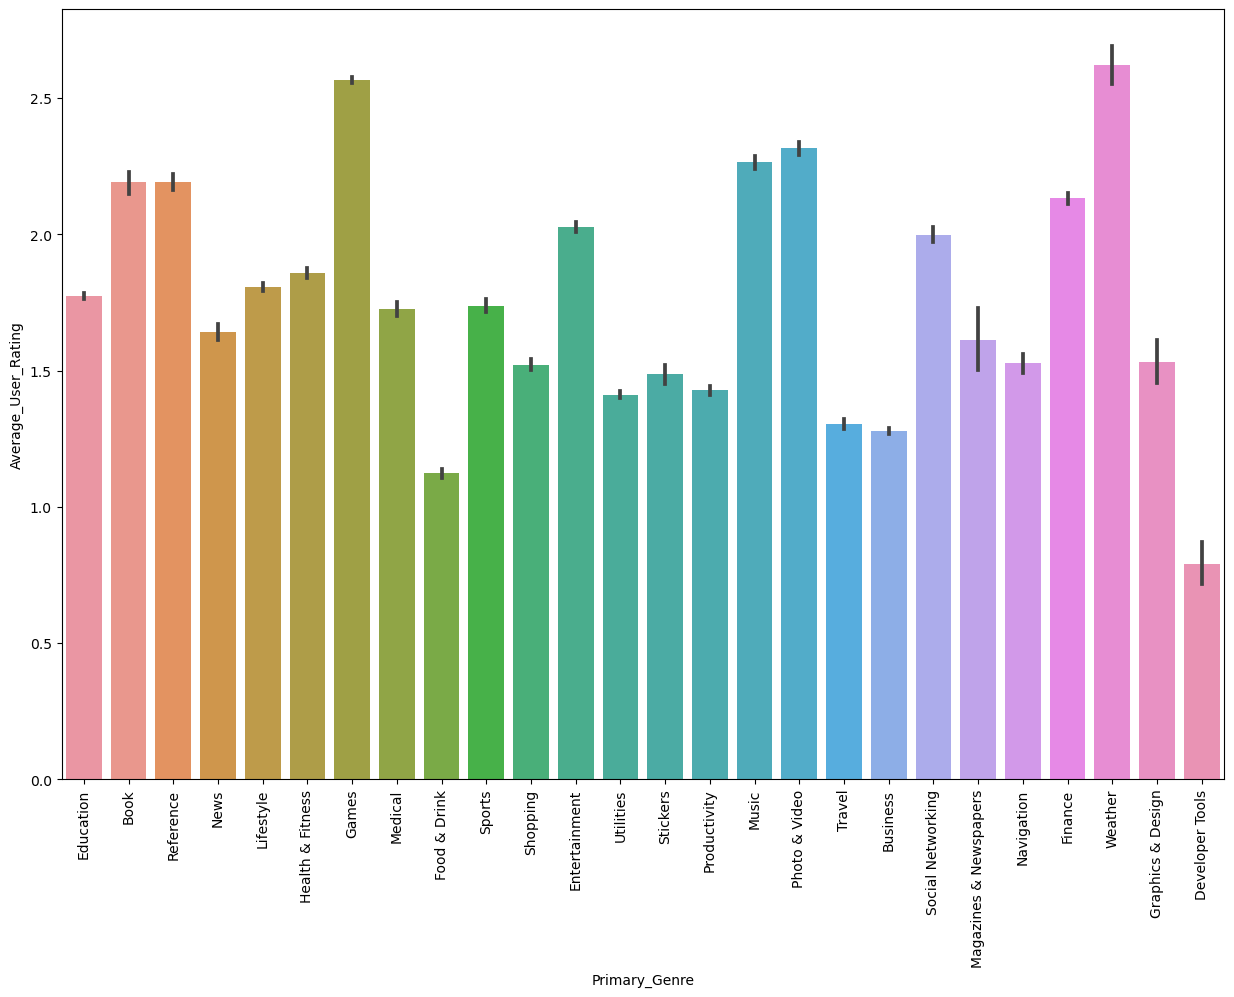

In [61]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Primary_Genre',y='Average_User_Rating')
plt.xticks(rotation=90)

Q. Primary_Genre vs Size in MBs?

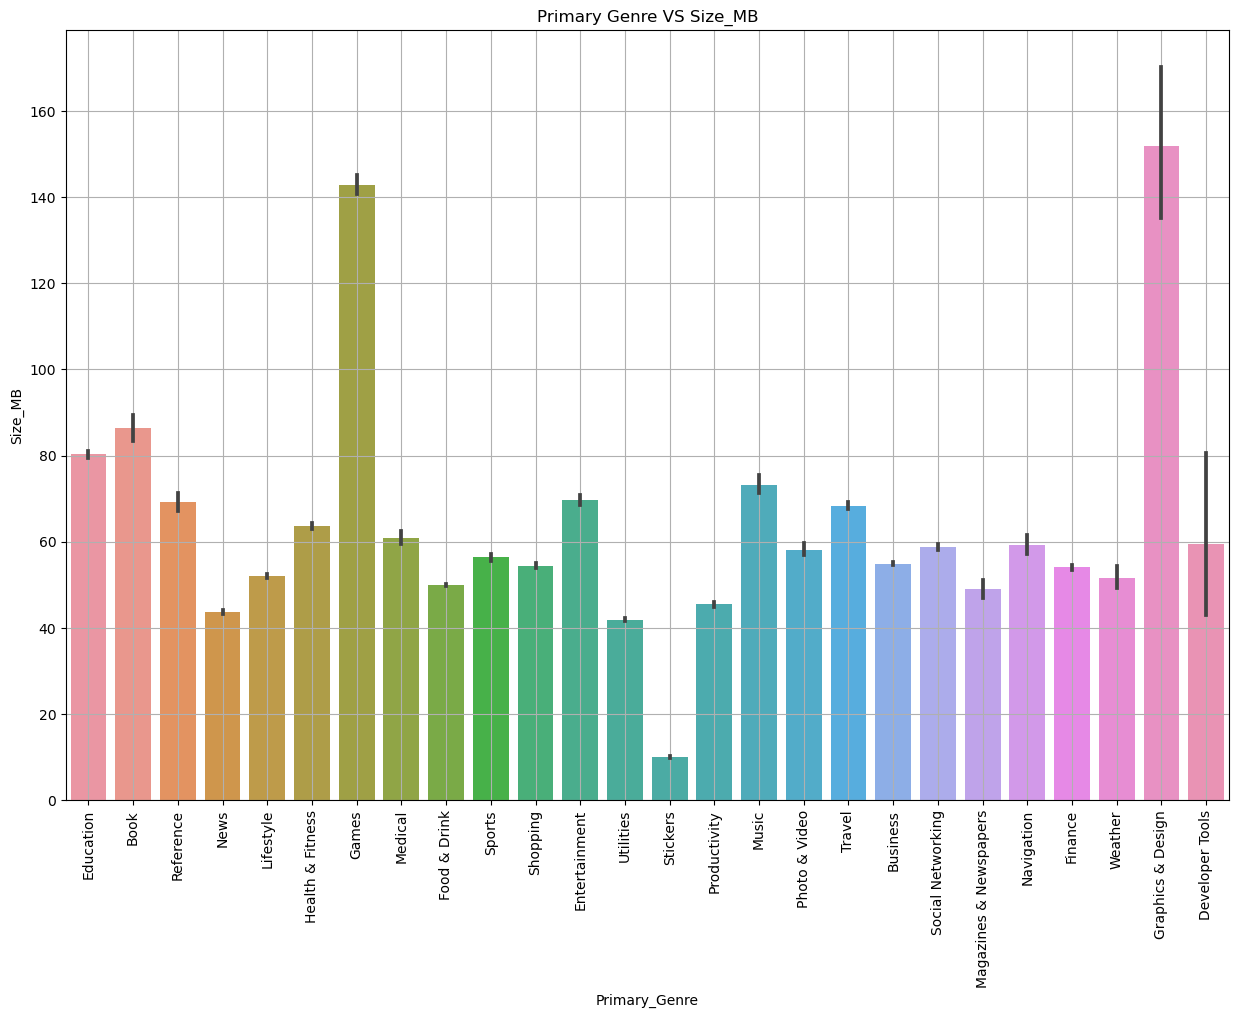

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Primary_Genre',y='Size_MB')
plt.xticks(rotation=90)

plt.title('Primary Genre VS Size_MB')

plt.grid()
plt.show()

> Graph2. Primary_Genre Vs App_Size(MB)

##### Insights From The Grapgh  primary Genre Vs App Size
From the above mentiond bar plot we can conclude that:
Games and Travel app usually has large datasize respectively
On other side Stickers and Developertools app hold the least

##### Insights
From the grapgh we get to know that from data, the higher rating more is the price of the app

#### Q. Top 10 app producing developer

In [51]:
# group the dataset by Primary_Genre and Type, and count the number of apps in each group
Top10_Cnt_Dev = df.groupby(['Developer']).size().reset_index(name='Count')

# ##load top 10 free apps
Top10_Cnt_App_Dev = Top10_Cnt_Dev.sort_values(by='Count', ascending=False).head(10)
Top10_Cnt_App_Dev.head(10)

,Developer,Count
84502,ChowNow,3966
432773,Touch2Success,1649
21446,Alexander Velimirovic,1506
259262,"MINDBODY, Incorporated",1247
331925,Phorest,1131
309328,OFFLINE MAP TRIP GUIDE LTD,1022
262967,Magzter Inc.,928
8456,ASK Video,781
345604,RAPID ACCELERATION INDIA PRIVATE LIMITED,733
306122,Nonlinear Educating Inc.,555


Text(0.5, 1.0, ' Top 10 App Producing developer')

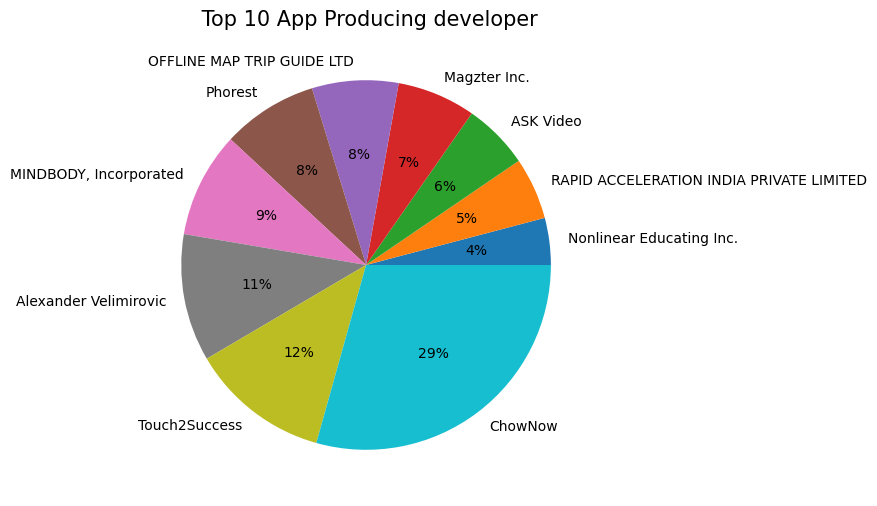

In [52]:
plt.figure(figsize=(8,6))
data = Top10_Cnt_App_Dev.groupby('Developer')['Count'].max().sort_values(ascending = True)
data = data.head(10)
labels = data.keys()
plt.pie(data, labels= labels,autopct='%.0f%%')
plt.title(" Top 10 App Producing developer", fontsize=15)

> Graph 6. Pie Chart for top 10 app develpers

##### Insigthts

- ChowNow
- Touch2Success
- Alexander Velimirovic
- MINDBODY, Incorporated
- Phorest
- OFFLINE MAP TRIP GUIDE LTD
- Magzter Inc.
- ASK Video
- RAPID ACCELERATION INDIA PRIVATE LIMITED
- Nonlinear Educating Inc.

In [53]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Version,Price,...,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Size_MB,Year,Type,ReviewCategory
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,Children,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.00,...,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,0,0,0.0,0,20.974609,2017,Free,NoReviewsProvided
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,Children,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.00,...,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,5,1,5.0,1,12.527344,2015,Free,Less than 10K
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,Children,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.00,...,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,0,0,0.0,0,20.926758,2021,Free,NoReviewsProvided
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,Children,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,2.99,...,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,0,0,0.0,0,78.059570,2012,Paid,NoReviewsProvided
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,Children,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,0.00,...,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,0,0,0.0,0,61.695312,2020,Free,NoReviewsProvided


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Book'),
  Text(2, 0, 'Reference'),
  Text(3, 0, 'News'),
  Text(4, 0, 'Lifestyle'),
  Text(5, 0, 'Health & Fitness'),
  Text(6, 0, 'Games'),
  Text(7, 0, 'Medical'),
  Text(8, 0, 'Food & Drink'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Shopping'),
  Text(11, 0, 'Entertainment'),
  Text(12, 0, 'Utilities'),
  Text(13, 0, 'Stickers'),
  Text(14, 0, 'Productivity'),
  Text(15, 0, 'Music'),
  Text(16, 0, 'Photo & Video'),
  Text(17, 0, 'Travel'),
  Text(18, 0, 'Business'),
  Text(19, 0, 'Social Networking'),
  Text(20, 0, 'Magazines & Newspapers'),
  Text(21, 0, 'Navigation'),
  Text(22, 0, 'Finance'),
  Text(23, 0, 'Weather'),
  Text(24, 0, 'Graphics & Design'),
  Text(25, 0, 'Developer Tools')])

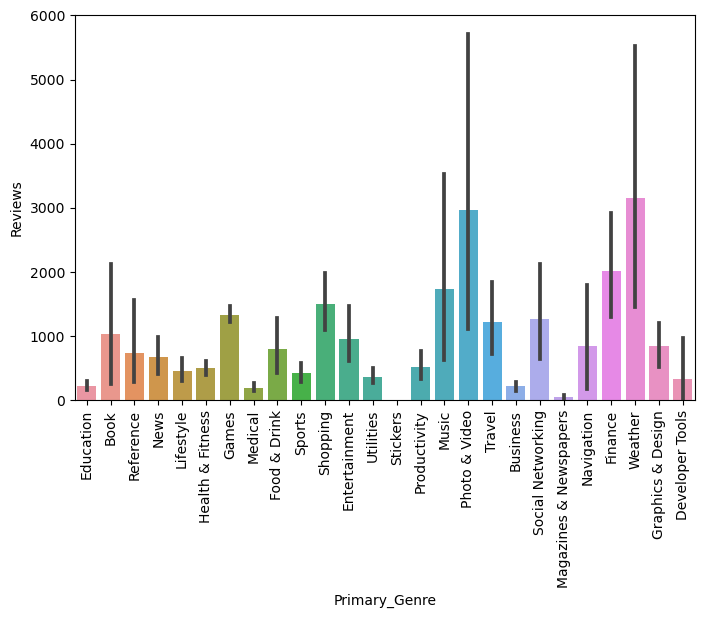

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Primary_Genre',y='Reviews')
plt.xticks(rotation=90)

##### Q. Which Primary_Genre attracts clients for getting better revenues

<Axes: xlabel='Primary_Genre'>

<Figure size 1500x1000 with 0 Axes>

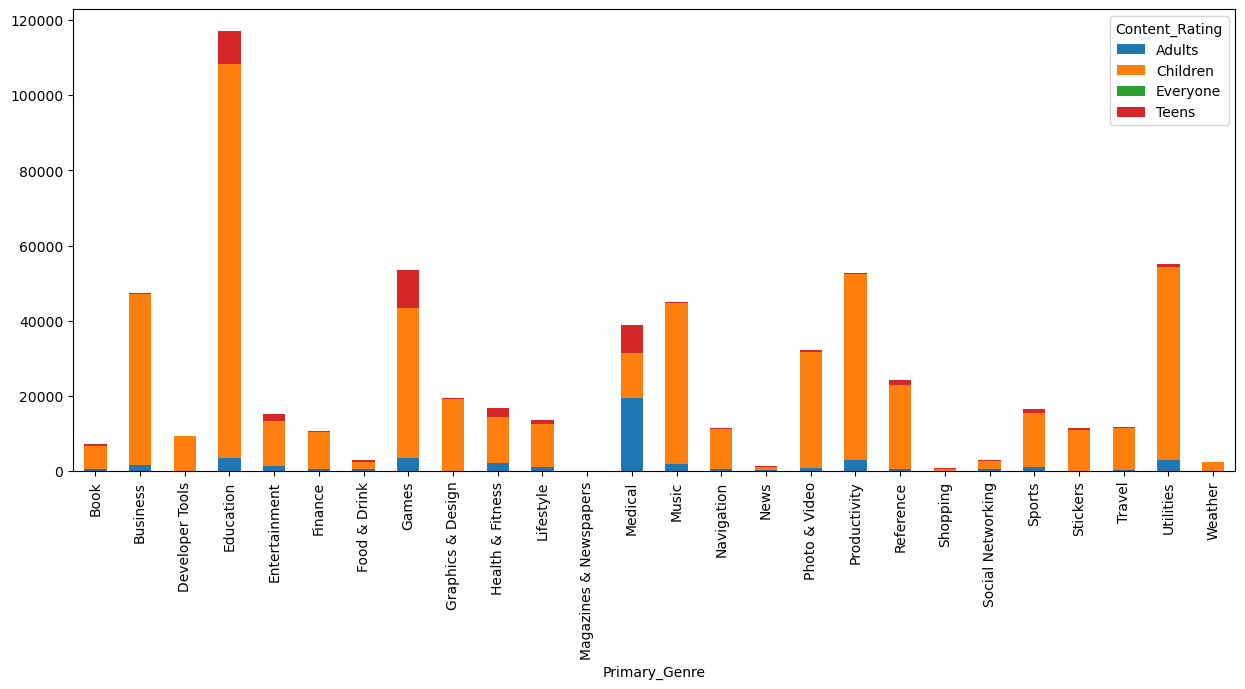

In [55]:
plt.figure(figsize=(15,10))
df.groupby(['Primary_Genre', 'Content_Rating'])['Price'].sum().unstack().plot(kind='bar', stacked=True)


Graph 7: Shows which genre attracted what kind of clintele in terms of revenues

 #### Q. top 10 Primary_Genre/Categories that are installed from the Apple Store?

In [56]:
# group the dataset by Primary_Genre and Type, and count the number of apps in each group
top_Genre = df.groupby(['Primary_Genre']).size().reset_index(name='Count')

##load top 10 free apps
top_Genre = top_Genre.sort_values(by='Count', ascending=False).head(10)
top_Genre.head(10)

,Primary_Genre,Count
7,Games,193641
1,Business,128203
3,Education,119114
24,Utilities,93937
10,Lifestyle,84493
6,Food & Drink,72815
9,Health & Fitness,60682
17,Productivity,59389
4,Entertainment,53076
19,Shopping,49493


Text(0.5, 1.0, ' Top Installed primary_Genre/Category Apps')

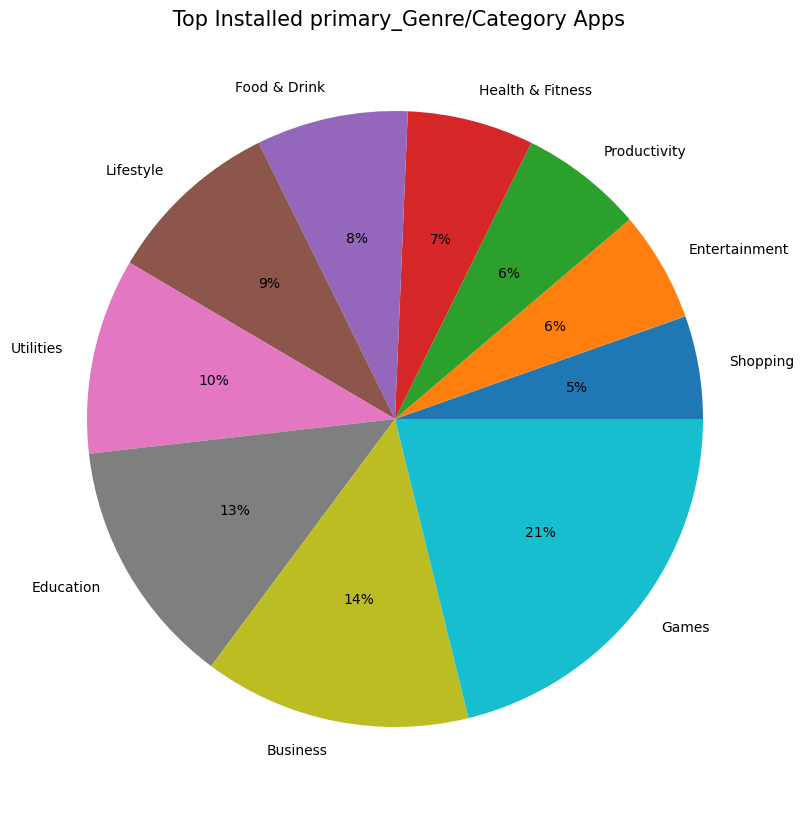

In [57]:
plt.figure(figsize=(20,10))
data = top_Genre.groupby('Primary_Genre')['Count'].max().sort_values(ascending = True)
data = data.head(10)
labels = data.keys()
plt.pie(data, labels= labels,autopct='%.0f%%')
plt.title(" Top Installed primary_Genre/Category Apps", fontsize=15)

> Graph 8: Top Primary_Genre/Category Apps Installed

##### Insights:
From the Grapgh 8 , games are the mostly installed apps

#### Q. What is the Distribution of App Size in M.B?

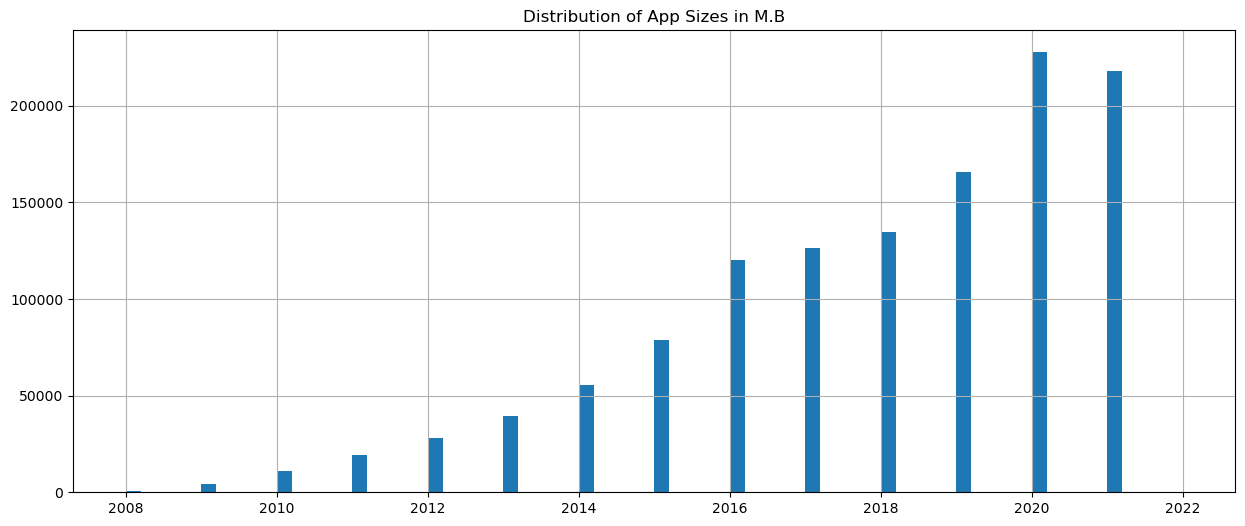

In [62]:
plt.hist(df['Year'], bins=70)

plt.title('Distribution of App Sizes in M.B')
plt.grid()
plt.show()

> Graph 9. Distribution of App Size(MB)

In [64]:
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Required_IOS_Version,Released,Updated,Version,Price,...,Developer,Developer_Url,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews,Size_MB,Year,Type,ReviewCategory
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,Children,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.00,...,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,0,0,0.0,0,20.974609,2017,Free,NoReviewsProvided
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,Children,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.00,...,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,5,1,5.0,1,12.527344,2015,Free,Less than 10K
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,Children,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.00,...,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,0,0,0.0,0,20.926758,2021,Free,NoReviewsProvided
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,Children,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,2.99,...,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,0,0,0.0,0,78.059570,2012,Paid,NoReviewsProvided
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,Children,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,0.00,...,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,0,0,0.0,0,61.695312,2020,Free,NoReviewsProvided


##### Insights:
From the grapgh we came to know that Majority of app size(MB) is between 10 to 40 MB.

Q:what is the age of people and what they are watching?

<Axes: xlabel='Primary_Genre,Content_Rating'>

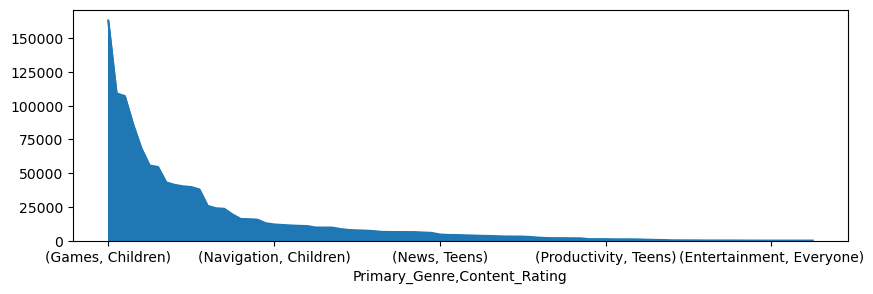

In [74]:
df[['Primary_Genre','Content_Rating']].value_counts().plot(kind="area",figsize=(10,3))

#### Q. What are the Top-5 Genre with respect to Average_User_Rating Over Years ?

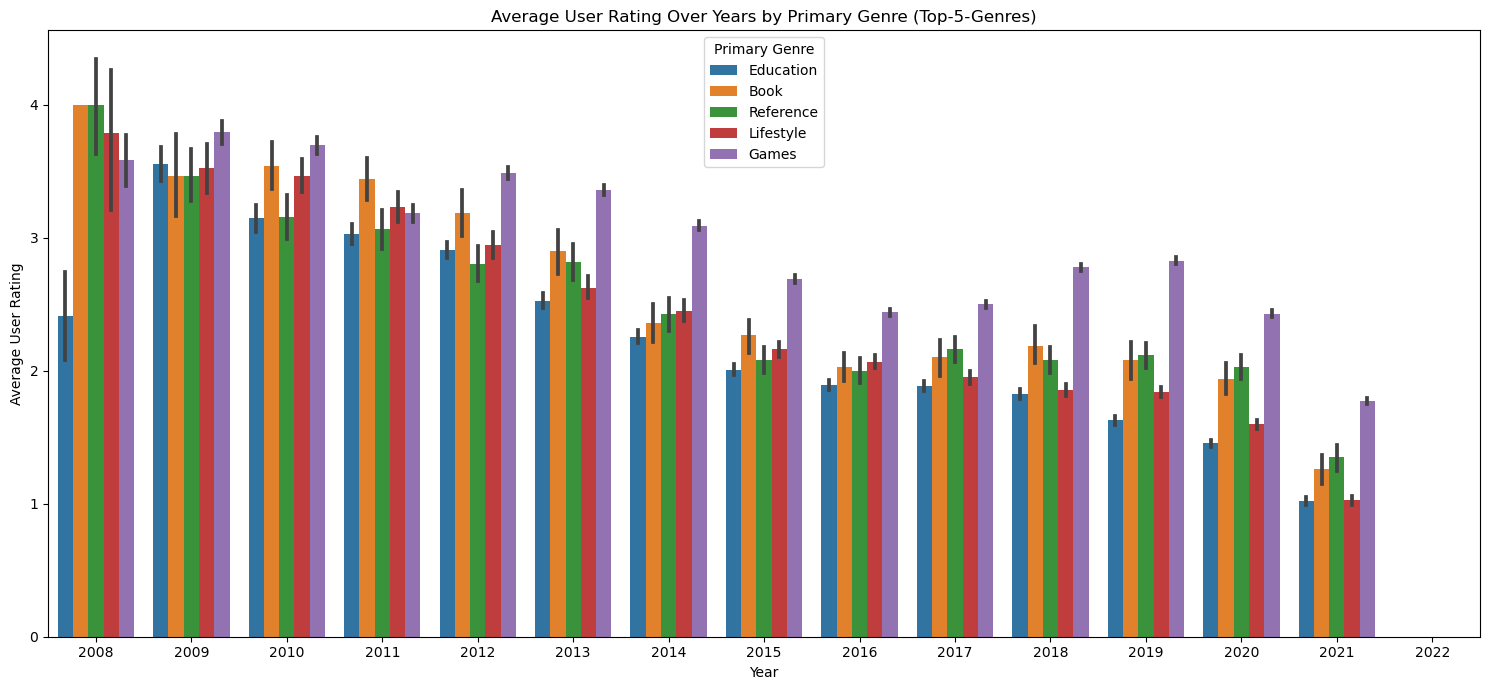

In [63]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Year', y='Average_User_Rating', hue='Primary_Genre', data=df_top_genres)
plt.title('Average User Rating Over Years by Primary Genre (Top-5-Genres)')
plt.xlabel('Year')
plt.ylabel('Average User Rating')
plt.tight_layout()
plt.legend(title='Primary Genre')
plt.show()

> Graph 9. Top Primary_Genre w.r.t. Avg. User Rating

#### Insights
From The graph we findout that Games, Finance, and  utilities got higher rating

### 6. Summary
The EDA exercise on the Apple App Store dataset yielded numerous exciting insights. The dataset was relatively clean and consistent throughout the analysis. We posed several questions to the dataset and provided detailed answers and findings as follows:

During this EDA exercise, we achieved several milestones. We removed null values from the dataset and found no duplications, except for app names. However, these were unique records with different versions, AppIds, and release dates. Our findings show that gaming apps are the most downloaded, and the top 10 highest-rated primary genres based on average user ratings are Weather, Games, Photo &amp; Videos, Music, and Books. We also found that the highest content rating for apps isis for children, adults, teens, and everyone, with a breakdown based on the number of apps under each category. We attempted to find a correlation between app size and price but found that, except for a few exceptions, the size of the app is irrelevant to the price. We also discovered that the higher the user rating, the higher the app's price.